In [ ]:
!pip install diffusers invisible_watermark transformers accelerate safetensors xformers

In [ ]:
!pip install -U controlnet_aux==0.0.7

In [ ]:
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter, EulerAncestralDiscreteScheduler, AutoencoderKL
from diffusers.utils import load_image, make_image_grid
from controlnet_aux.canny import CannyDetector
import torch

# load adapter
adapter = T2IAdapter.from_pretrained("TencentARC/t2i-adapter-canny-sdxl-1.0", torch_dtype=torch.float16, varient="fp16").to("cuda")

# load euler_a scheduler
model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
euler_a = EulerAncestralDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
vae=AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLAdapterPipeline.from_pretrained(
    model_id, vae=vae, adapter=adapter, scheduler=euler_a, torch_dtype=torch.float16, variant="fp16",
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()

canny_detector = CannyDetector()


In [ ]:
image = load_image("/content/test.png")

# Detect the canny map in low resolution to avoid high-frequency details
image = canny_detector(image, detect_resolution=1024, image_resolution=1024)#.resize((1024, 1024))


In [ ]:
prompt = 'the text, "Reveal Your Natural", "Glow with Organic Rose", "Water Toner!"'
negative_prompt = "extra letters, fewer digits, cropped, worst quality, low quality, glitch, deformed, mutated, ugly, disfigured"

gen_images = pipe(
  prompt=prompt,
  negative_prompt=negative_prompt,
  image=image,
  num_inference_steps=30,
  guidance_scale=7.5,
  adapter_conditioning_scale=0.8,
  adapter_conditioning_factor=1
).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

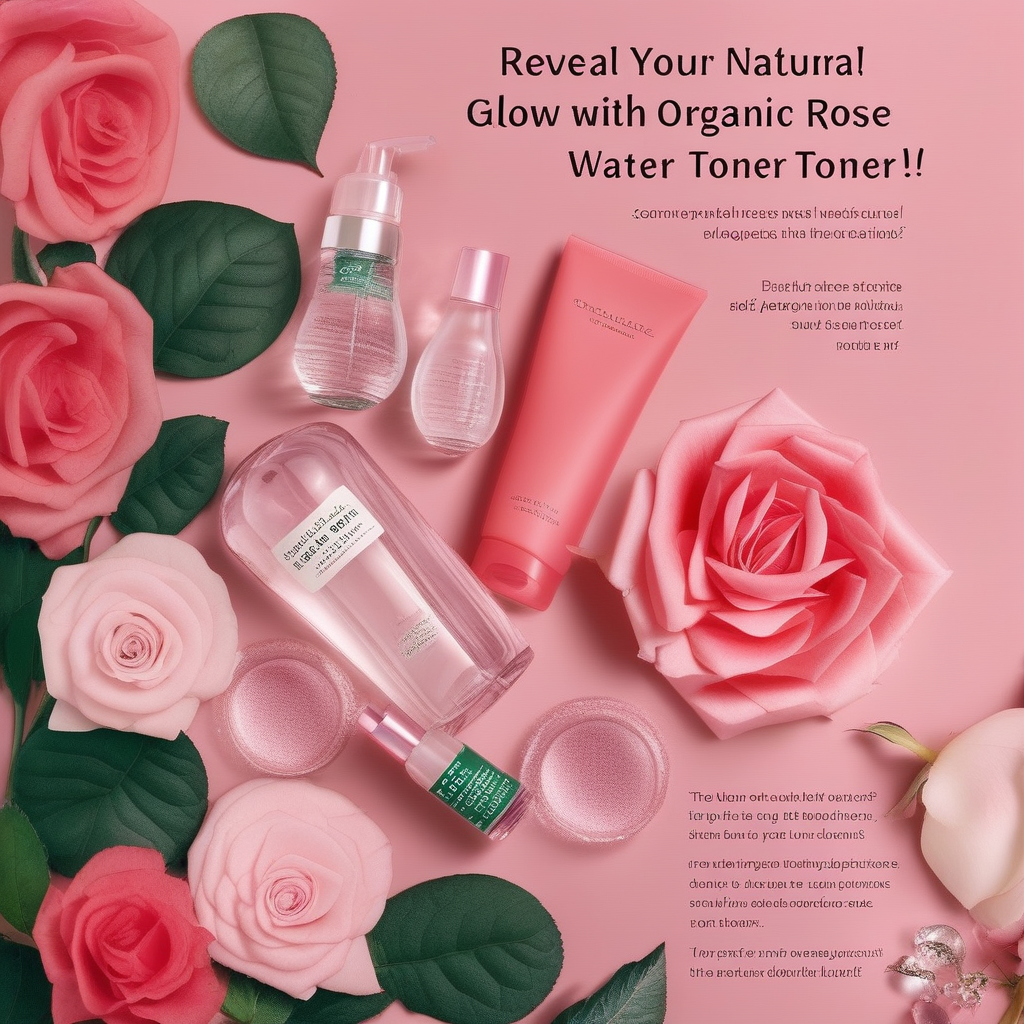

In [ ]:
gen_images

In [ ]:
from diffusers import ControlNetModel, StableDiffusionXLControlNetInpaintPipeline, AutoencoderKL, DDIMScheduler, EulerAncestralDiscreteScheduler
from diffusers.utils import load_image
from controlnet_aux.canny import CannyDetector
from PIL import Image
import torch
import numpy as np
import cv2

In [ ]:
controlnet = ControlNetModel.from_pretrained(
    "diffusers/controlnet-canny-sdxl-1.0",
    torch_dtype=torch.float16,
    varient="fp16"
).to("cuda")
model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
euler_a = EulerAncestralDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionXLControlNetInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    controlnet=controlnet,
    vae=vae,
    scheduler=euler_a,
    torch_dtype=torch.float16,
    varient="fp16"
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

canny_detector = CannyDetector()

Keyword arguments {'varient': 'fp16'} are not expected by StableDiffusionXLControlNetInpaintPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
product = load_image("/content/image_1_dreambooth.png")
mask = load_image("/content/test.png")
cannyimage = canny_detector(mask, detect_resolution=1024, image_resolution=1024)

In [ ]:
cannyimage

In [ ]:
prompt = 'Reveal Your Natural Glow with Organic Rose Water Toner, text'
negative_prompt = "extra digit, fewer digits, cropped, worst quality, low quality, glitch, deformed, mutated, ugly, disfigured"

gen_images = pipe(
  prompt=prompt,
  negative_prompt=negative_prompt,
  image=product,
  mask_image=mask,
  control_image=cannyimage,
  num_inference_steps=30,
  guidance_scale=9.5,
  strength=1,
).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
gen_images

In [ ]:
import torch
from diffusers import DiffusionPipeline, T2IAdapter
from diffusers.utils import load_image
from PIL import Image

In [ ]:
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter, EulerAncestralDiscreteScheduler, AutoencoderKL
from diffusers.utils import load_image, make_image_grid
from diffusers.utils.torch_utils import randn_tensor
from controlnet_aux.canny import CannyDetector
import torch

# load adapter
adapter = T2IAdapter.from_pretrained("TencentARC/t2i-adapter-canny-sdxl-1.0", torch_dtype=torch.float16, varient="fp16").to("cuda")

# load euler_a scheduler
model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
euler_a = EulerAncestralDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")

vae=AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)

pipe = DiffusionPipeline.from_pretrained(
    model_id,
    vae=vae,
    adapter=adapter,
    scheduler=euler_a,
    custom_pipeline="jakebabbidge/sdxl-adapter-inpaint",
    torch_dtype=torch.float16,
    variant="fp16",
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()

canny_detector = CannyDetector()

In [ ]:
image = Image.open(image_path).convert("RGB")
mask = Image.open(mask_path).convert("RGB")

# SDXL Base

In [ ]:
from diffusers import ControlNetModel, DDIMScheduler, AutoPipelineForInpainting, StableDiffusionXLInpaintPipeline ,StableDiffusionXLControlNetInpaintPipeline, AutoencoderKL, StableDiffusionUpscalePipeline
from diffusers.utils import load_image
import torch
import cv2
import numpy as np
from PIL import Image

In [ ]:
device = "cuda"

controlnet = ControlNetModel.from_pretrained(
    "diffusers/controlnet-canny-sdxl-1.0", torch_dtype=torch.float16, use_safetensors=True)

pipe = StableDiffusionXLControlNetInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    use_safetensors=True
).to(device)
pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)


# Image Load

In [ ]:
img_black_bg = load_image("/content/product.png")
canny = load_image("/content/productcanny.png")
mask = load_image("/content/productmask.png")

# Output

In [ ]:
generator = torch.manual_seed(128)
output = pipe(
  prompt="photo of the product placed on a mossy rock and a product tagline, white wood anemone blossoms, Loch Ken, Scotland, studio photography, photorealistic, detailed, natural, candid shot",
  negative_prompt="lowres, worst quality, low quality, wrong proportions",
  image=img_black_bg,
  mask_image=mask,
  control_image=canny,
  generator=generator,
  num_images_per_prompt=1,
  num_inference_steps=30,
  guidance_scale=9.5,
  controlnet_conditioning_scale = 0.5,
  eta=1.0,
  strength=1,
).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

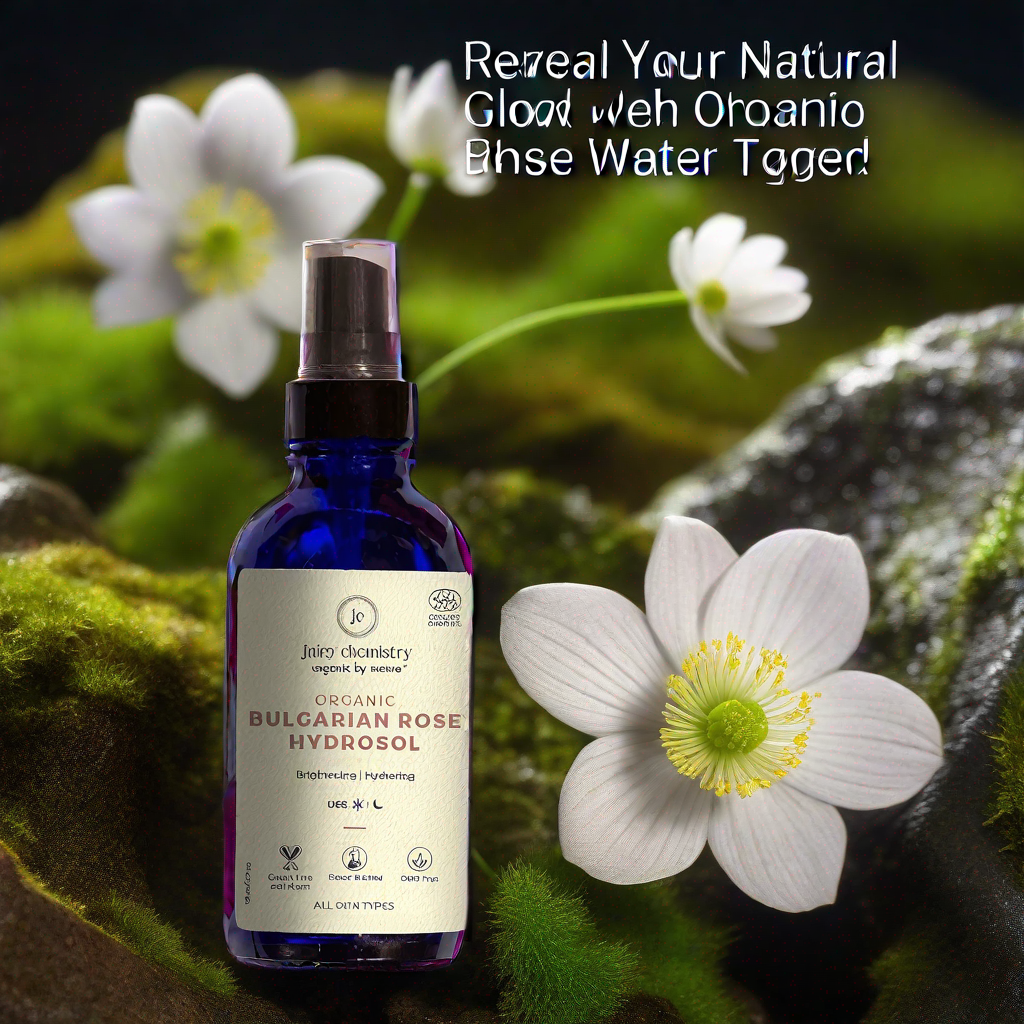

In [ ]:
output

## XL

In [ ]:
with torch.inference_mode():
    output = pipe(
        prompt="product placed on a polished wooden bar top, warm inviting glow, upscale bar interior, soft lighting, Beside the glass, sense of warmth, exclusivity, and relaxation",
        negative_prompt="lowres, worst quality, low quality, wrong proportions",
        image=img_black_bg,
        mask_image=mask,
        control_image=canny,
        num_images_per_prompt=1,
        num_inference_steps=30,
        guidance_scale=12.5,
        strength=1
    )
    for image in output.images:
      image

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
image

In [ ]:
with torch.inference_mode():
    output = pipe(
        prompt="product on a mossy rock, white wood anemone blossoms, Loch Ken, Scotland, commercial whiskey product photography, photorealistic, detailed, natural, candid shot",
        negative_prompt="lowres, worst quality, low quality, wrong proportions",
        image=img_black_bg,
        mask_image=mask,
        control_image=canny,
        num_images_per_prompt=1,
        num_inference_steps=30,
        guidance_scale=12.5,
        strength=1
    )
    for image in output.images:
      image

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
image

## Different Model

In [ ]:
with torch.inference_mode():
    output = pipe(
        prompt="product on a mossy rock, white wood anemone blossoms, Loch Ken, Scotland, commercial whiskey product photography, photorealistic, detailed, natural, candid shot",
        negative_prompt="lowres, worst quality, low quality, wrong proportions",
        image=img_black_bg,
        mask_image=mask,
        control_image=canny,
        num_images_per_prompt=1,
        num_inference_steps=30,
        guidance_scale=12.5,
        strength=1
    )
    for image in output.images:
      image

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
image